<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Tarea Semanal Nº4
#### Tobías Guerrero

## 1. Introducción

En esta trabajo semanal, se retoma la consigna de la anterior, donde se simuló el bloque de cuantización de un ADC de B bits en un rango de $ ±V_{F} $ Volts. Se busca completar la simulación del ADC incluyendo la capacidad de muestrear a fs Hertz. Para ello se simulará el comportamiento del dispositivo al digitalizar una senoidal contaminada con un nivel predeterminado de ruido. Se comenzará simulando una senoidal, de frecuencia arbitraria $f_{0}$ (por ejemplo, $f_{0} = f_{S} / N = \Delta f$), y energía normalizada, contaminada por un ruido aditivo de potencia $P_{n} = k_{n} \cdot P_{Q}$ W, siendo el factor k una escala para la potencia del ruido de cuantización $P_{Q} = \frac{q^{2}}{12}$. Este ruido será incorrelado y Gaussiano.
El ADC trabajará a una frecuencia de muestreo $f_{S}=1000$ Hz y tendrá un rango analógico de $±V_{F} = 2$ Volts.

Se realizarán distintas simulaciones:
- En primer lugar, una primera simulación con B = 4 y k = 1.
- Luego, se repetirá para valores de B de 8 y 16 bits, y k de 0.1 y 10.

## 2. Resolución

In [1]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Función generadora de señales
def mifuncion( modo = "seno" , vmax = 1 , dc = 0 , ff = 1 , ph = 0 , nn = 1000 , fs = 1000 ):
    x = np.linspace(0 , (nn-1)/fs , nn) # Genero el array de tiempo
    if modo == "seno":
        y = dc + vmax * np.sin(2*np.pi*ff*x + ph) # Para generar la función senoidal utilizo la función provista por numpy
    elif modo == "cuadrada":
        y = dc + vmax * np.sign(np.sin(2*np.pi*ff*x + ph)) # Para generar una función cuadrada tomo el signo de la función seno
    elif modo == "diente":
        y = dc + 2 * vmax * (x * ff%1) - vmax # Para generar una función diente de sierra utilizo la fórmula de la recta que la representa. Al eje x lo escalo por la frecuencia para que se repita las veces que corresponda
    elif modo == "triangular":
        y = dc + 2 * vmax * (1 - np.abs((x * ff%1) - 0.5) * 2) - vmax ## Para generar una función triangular utilizo la fórmula que la representa. Al eje x lo escalo por la frecuencia para que se repita las veces que corresponda
    return x,y

# Función de cuantización
def cuantizar(x , vf = 1, b = 4):
    nn = len(x)
    # Salto de cuantización
    q = vf / (2**(b-1))
    print(q)
    # Arrays de señal cuantizada y error
    sq = np.zeros(len(sr))
    e = np.zeros(len(sr))
    for i in range(nn):
        sq[i] = round(sr[i]/q)*q
        # Verifico saturación
        if sq[i] > vf:
            sq[i] = vf
        elif sq[i] < -vf:
            sq[i] = -vf
        e[i] = sq[i] - sr[i]
    return sq , e

In [3]:
# Definición de variables
k = 1
b = 4

vf = 2
q = vf / (2**(b-1))

modo = "seno"
nn = 1000
fs = nn
frec = fs / nn

bins = 10

# Generación de la señal analógica
t , s = mifuncion( modo , ff =  frec , nn = nn , fs = fs )

# Generación del ruido y señal contaminada
r = np.random.normal(0, np.sqrt(k) * q / np.sqrt(12), nn)
sr = s + r

# Cuantización
sq , e = cuantizar(sr , vf , b)

# Transformada de Fourier de todas las señales
S = np.fft.fft(s , axis = 0) / nn
SR = np.fft.fft(sr , axis = 0) / nn
SQ = np.fft.fft(sq , axis = 0) / nn
E = np.fft.fft(e , axis = 0) / nn
R = np.fft.fft(r , axis = 0) / nn

# Generación del eje de frecuencias
ff = np.fft.fftfreq(nn, d=1/fs)  
bfrec = ff <= fs/2

# Cálculo de la media de las señales de ruido
Nnq_mean = np.mean(np.abs(E)**2)
nNn_mean = np.mean(np.abs(R)**2)

# Cálculo para presentación de gráficos en escala logarítmica
ft_Srq_graph = 10 * np.log10(2 * np.abs(SQ[bfrec])**2)
ft_As_graph  = 10 * np.log10(2 * np.abs(S[bfrec])**2)
ft_Sr_graph  = 10 * np.log10(2 * np.abs(SR[bfrec])**2)
ft_Nn_graph  = 10 * np.log10(2 * np.abs(R[bfrec])**2)
ft_Nq_graph  = 10 * np.log10(2 * np.abs(E[bfrec])**2)
nNn_mean_graph = 10 * np.log10(2 * np.array([nNn_mean, nNn_mean]))
Nnq_mean_graph = 10 * np.log10(2 * np.array([Nnq_mean, Nnq_mean]))

0.25


## 3. Resultados - Primera parte

<unknown>:24: SyntaxWarning: invalid escape sequence '\o'
<unknown>:27: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:27: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:27: SyntaxWarning: invalid escape sequence '\o'
<ipython-input-4-4764caffd86c>:24: SyntaxWarning: invalid escape sequence '\o'
  '--r', label='$ \overline{n} =$' + '{:3.1f} dB'.format(10 * np.log10(2 * nNn_mean)))
<ipython-input-4-4764caffd86c>:27: SyntaxWarning: invalid escape sequence '\o'
  '--c', label='$ \overline{n_Q} =$' + '{:3.1f} dB'.format(10 * np.log10(2 * Nnq_mean)))


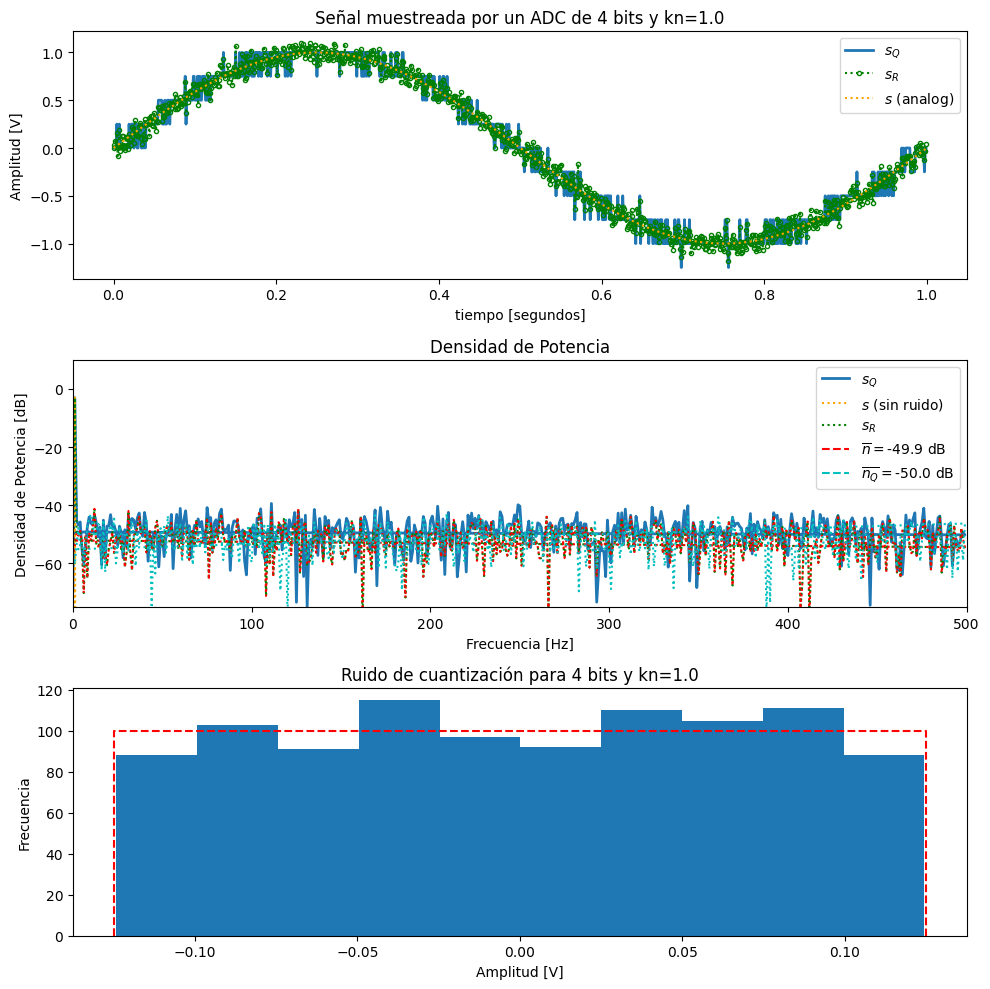

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Señales en el tiempo
axs[0].plot(t, sq, lw=2, label='$ s_Q $')
axs[0].plot(t, sr, linestyle=':', color='green', marker='o', markersize=3,
            markerfacecolor='none', markeredgecolor='green', fillstyle='none',
            label='$ s_R $')
axs[0].plot(t, s, color='orange', ls='dotted', label='$ s $ (analog)')
axs[0].set_title('Señal muestreada por un ADC de {:d} bits y kn={:.1f}'.format(b, k))

axs[0].set_xlabel('tiempo [segundos]')
axs[0].set_ylabel('Amplitud [V]')
axs[0].legend()

# Densidad de potencia
axs[1].plot(ff[bfrec], ft_Srq_graph, lw=2, label='$ s_Q $')
axs[1].plot(ff[bfrec], ft_As_graph, color='orange', ls='dotted', label='$ s $ (sin ruido)')
axs[1].plot(ff[bfrec], ft_Sr_graph, ':g', label='$ s_R $')

axs[1].plot(ff[bfrec], ft_Nn_graph, ':r')
axs[1].plot(ff[bfrec], ft_Nq_graph, ':c')

axs[1].plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), nNn_mean_graph,
             '--r', label='$ \overline{n} =$' + '{:3.1f} dB'.format(10 * np.log10(2 * nNn_mean)))

axs[1].plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), Nnq_mean_graph,
             '--c', label='$ \overline{n_Q} =$' + '{:3.1f} dB'.format(10 * np.log10(2 * Nnq_mean)))

axs[1].set_title('Densidad de Potencia')
axs[1].set_ylabel('Densidad de Potencia [dB]')
axs[1].set_xlabel('Frecuencia [Hz]')
axes_hdl_1 = axs[1].legend()
axs[1].set_ylim((1.5*np.min(10*np.log10(2*np.array([Nnq_mean, nNn_mean]))), 10))
axs[1].set_xlim(0, fs/2)

# Histograma del ruido de cuantificación
axs[2].hist(e, bins=bins)
axs[2].plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, nn/bins, nn/bins, 0]), '--r')
axs[2].set_title('Ruido de cuantización para {:d} bits y kn={:.1f}'.format(b, k))
axs[2].set_xlabel('Amplitud [V]')
axs[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## 4. Resultados - Segunda parte

Para esta segunda parte, se realizó un doble bucle para barrer cada caso posible de combinación entre B y k, y así poder observar las diferencias entre cada caso.

<unknown>:56: SyntaxWarning: invalid escape sequence '\o'
<unknown>:59: SyntaxWarning: invalid escape sequence '\o'
<>:56: SyntaxWarning: invalid escape sequence '\o'
<>:59: SyntaxWarning: invalid escape sequence '\o'
<>:56: SyntaxWarning: invalid escape sequence '\o'
<>:59: SyntaxWarning: invalid escape sequence '\o'
<ipython-input-5-2a906f46337a>:56: SyntaxWarning: invalid escape sequence '\o'
  '--r', label='$ \overline{n} =$' + '{:3.1f} dB'.format(10 * np.log10(2 * nNn_mean)))
<ipython-input-5-2a906f46337a>:59: SyntaxWarning: invalid escape sequence '\o'
  '--c', label='$ \overline{n_Q} =$' + '{:3.1f} dB'.format(10 * np.log10(2 * Nnq_mean)))


0.25


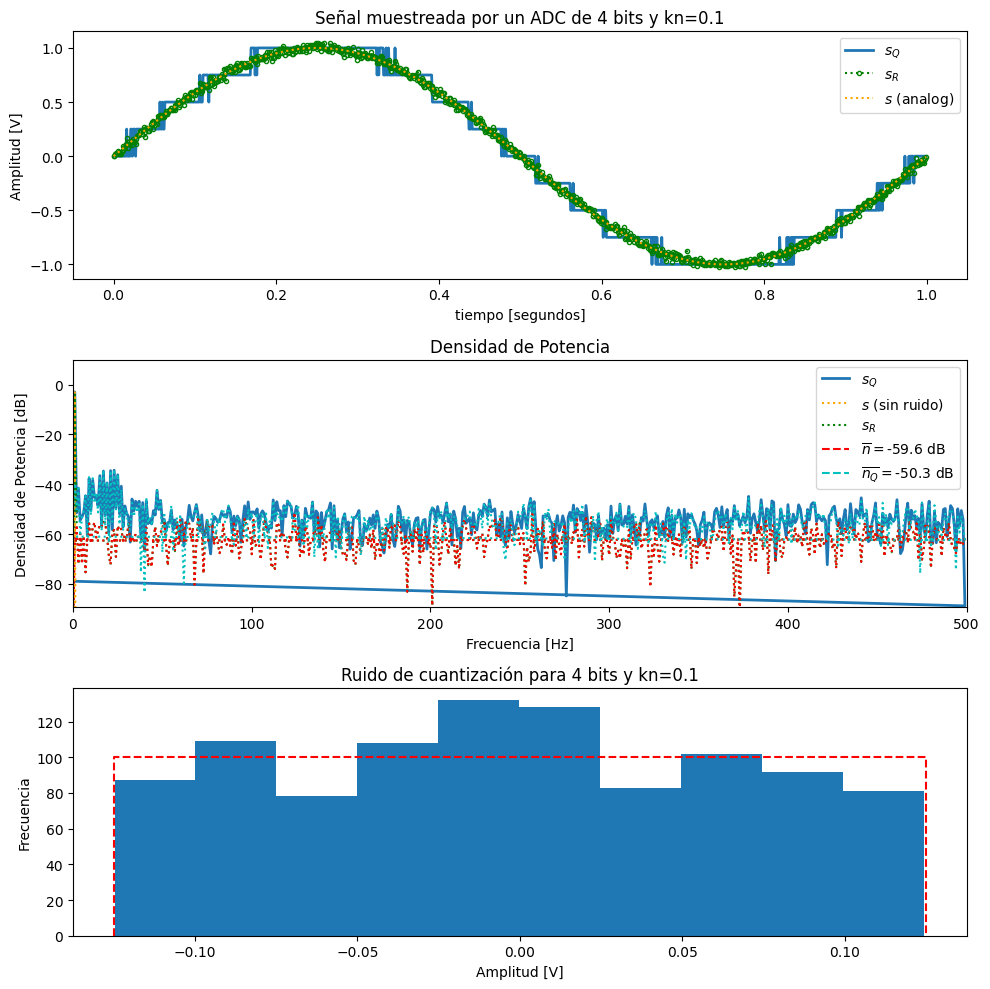

0.25


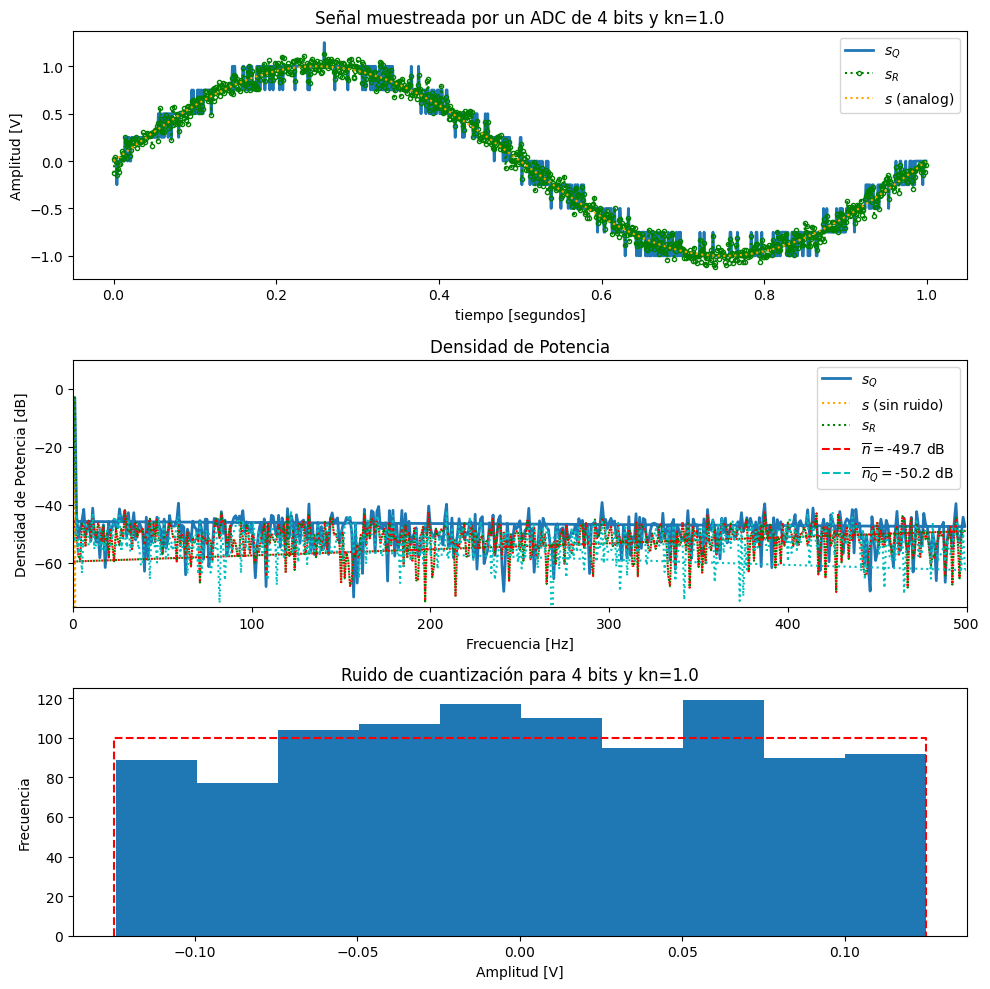

0.25


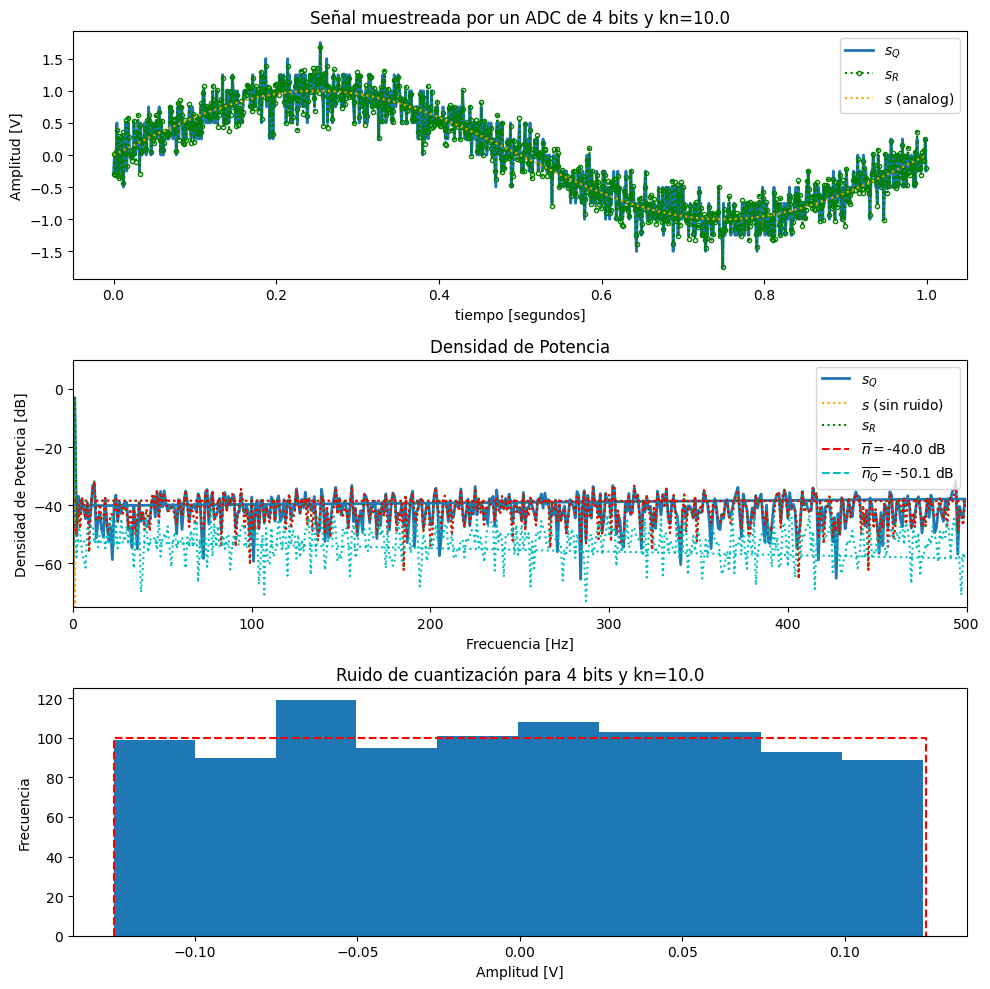

0.015625


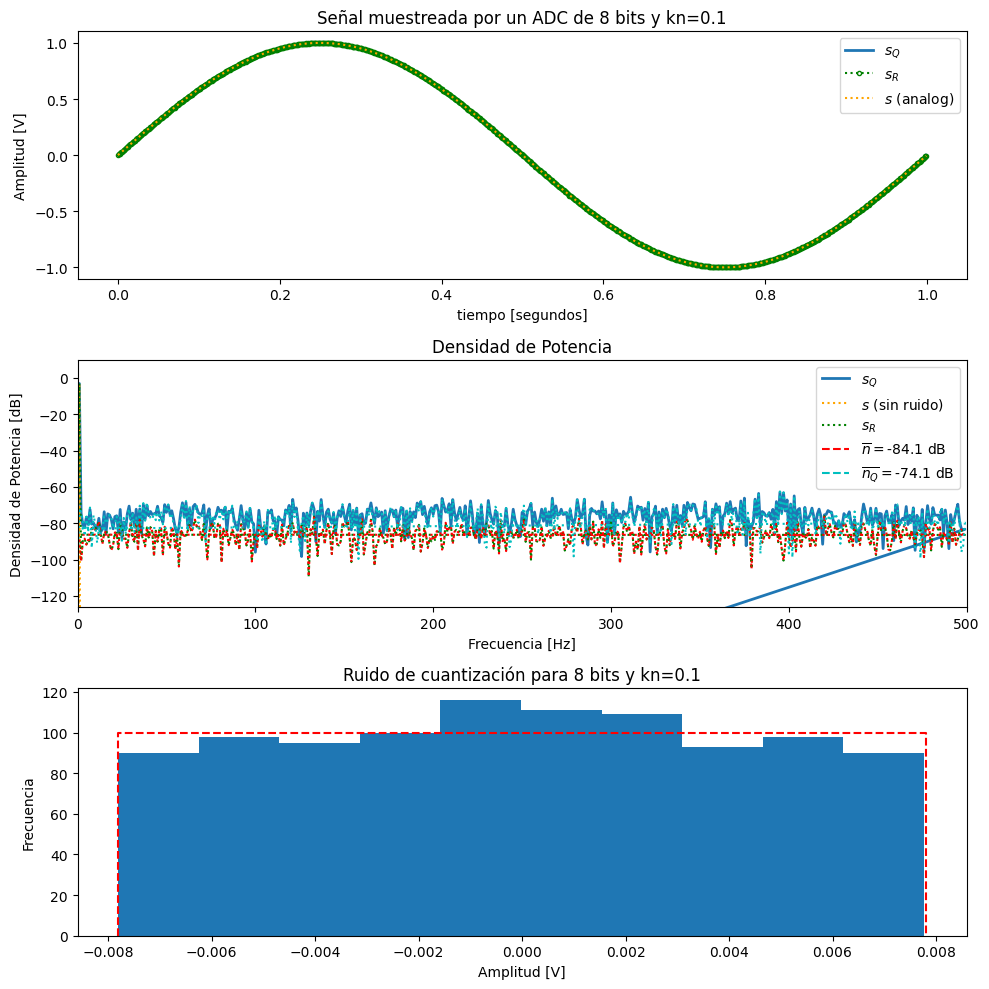

0.015625


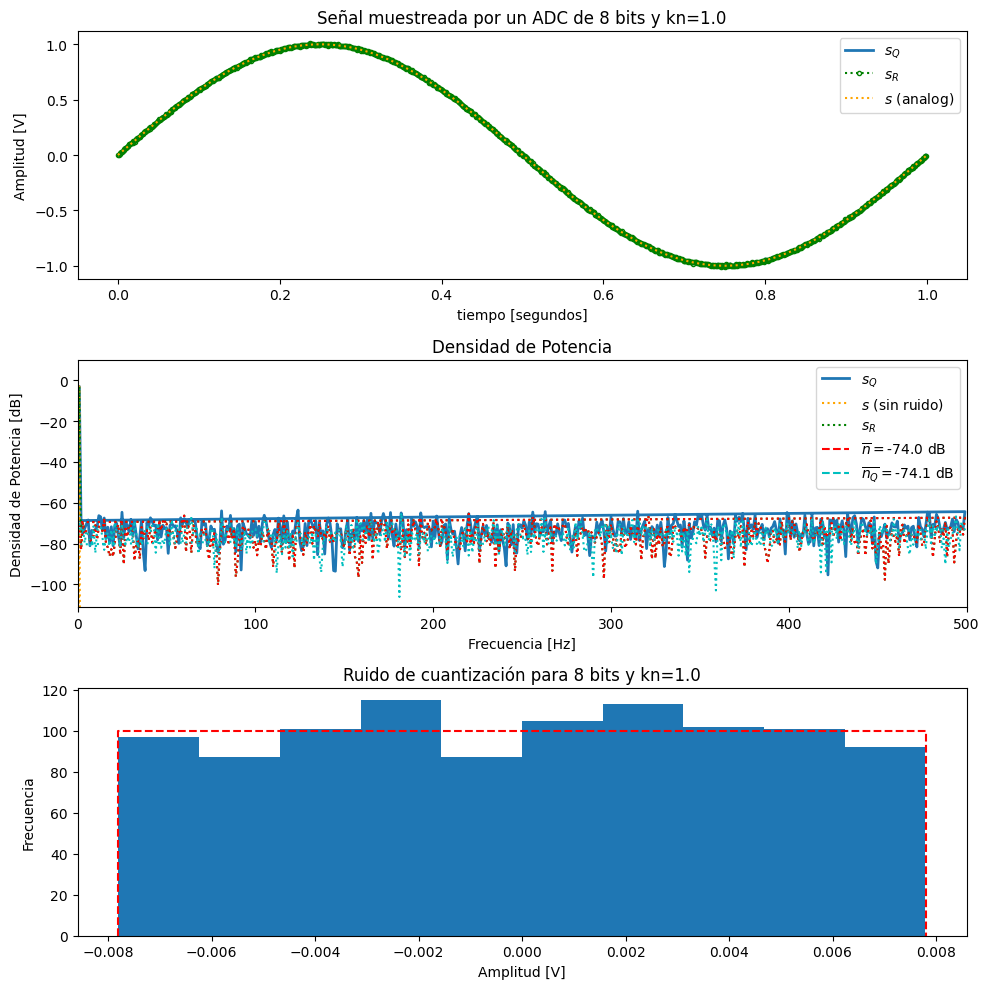

0.015625


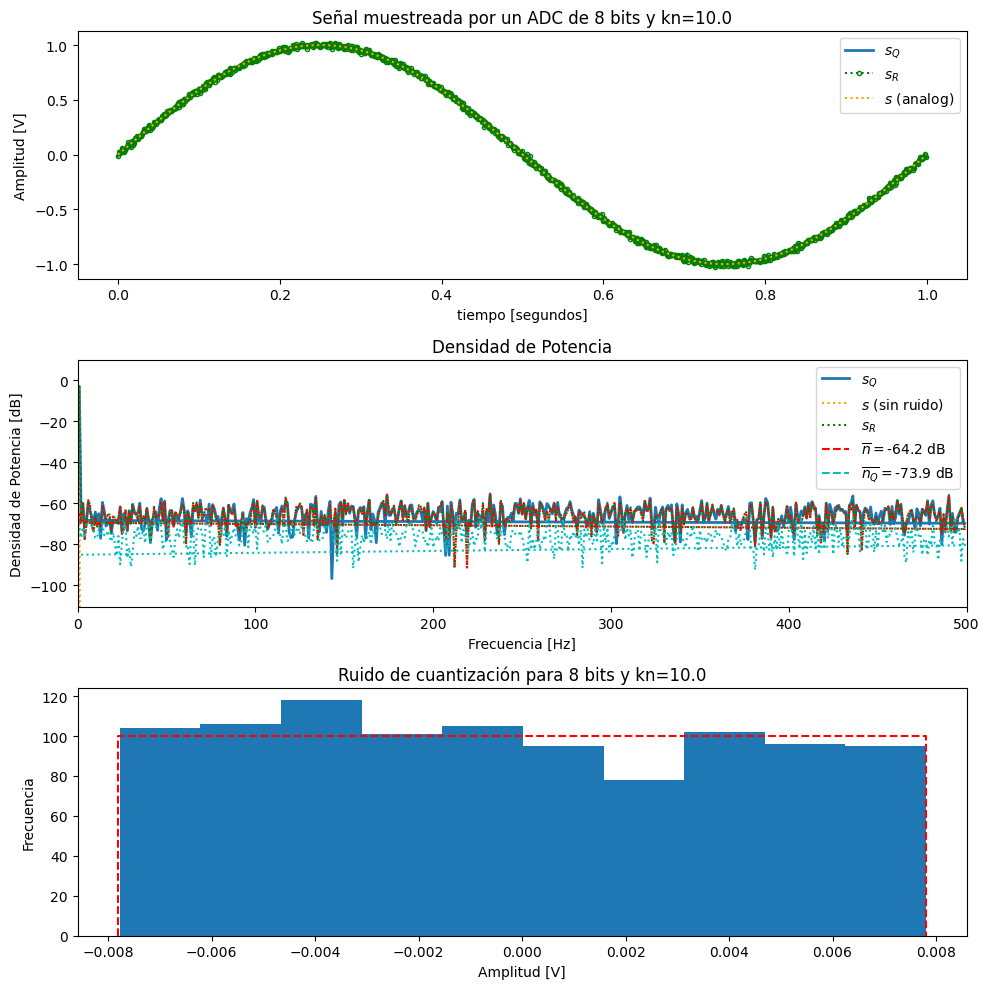

6.103515625e-05


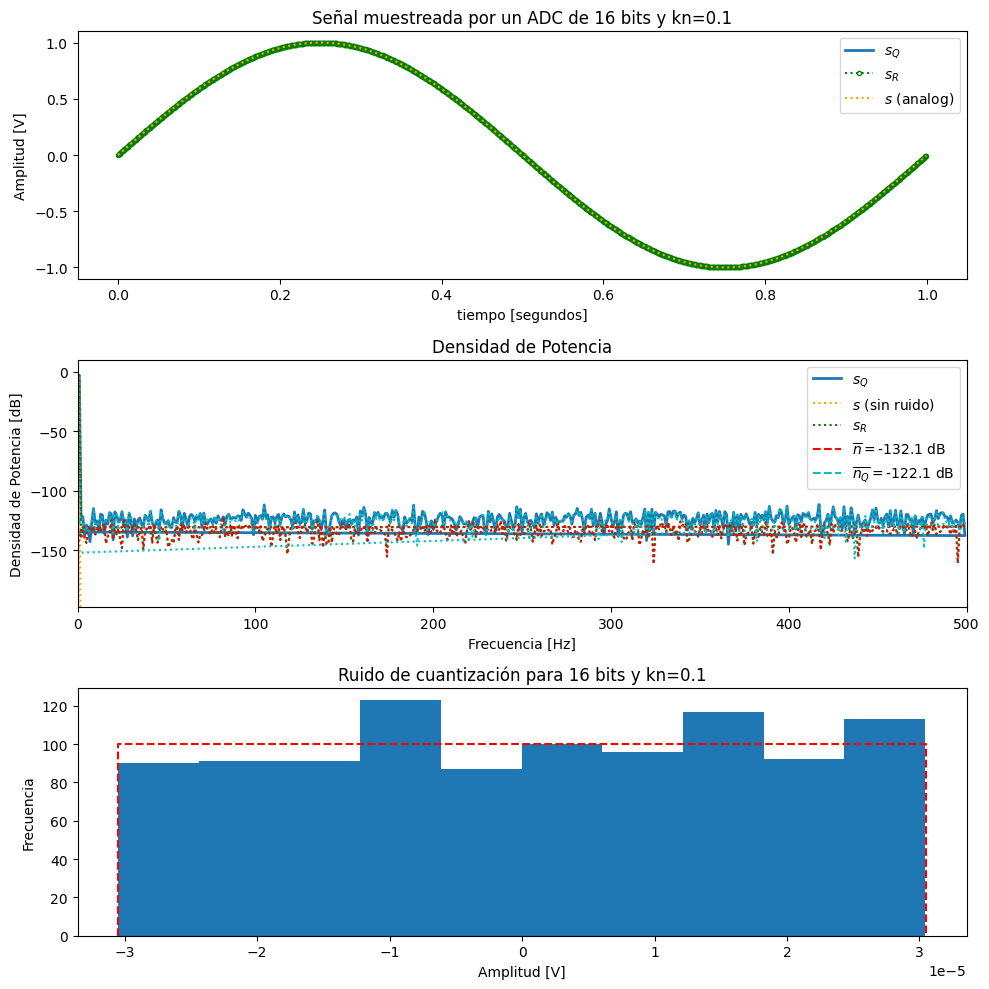

6.103515625e-05


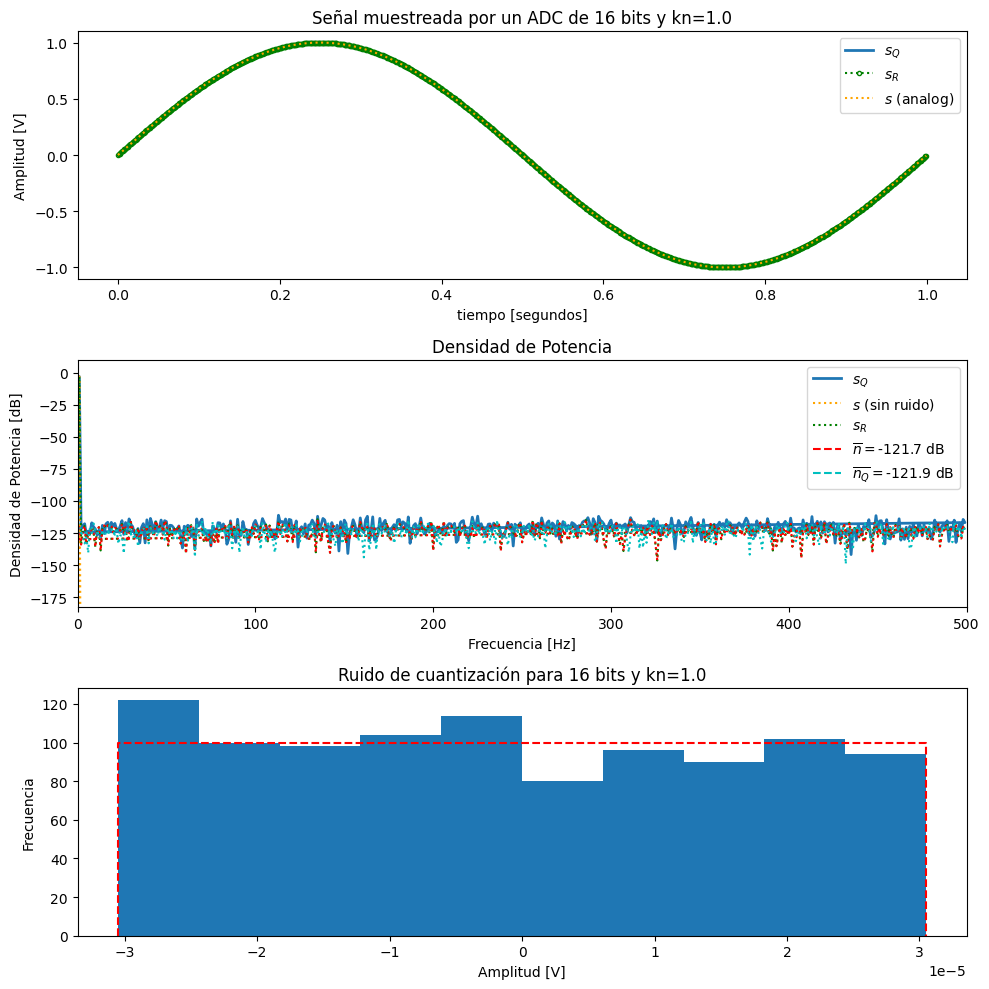

6.103515625e-05


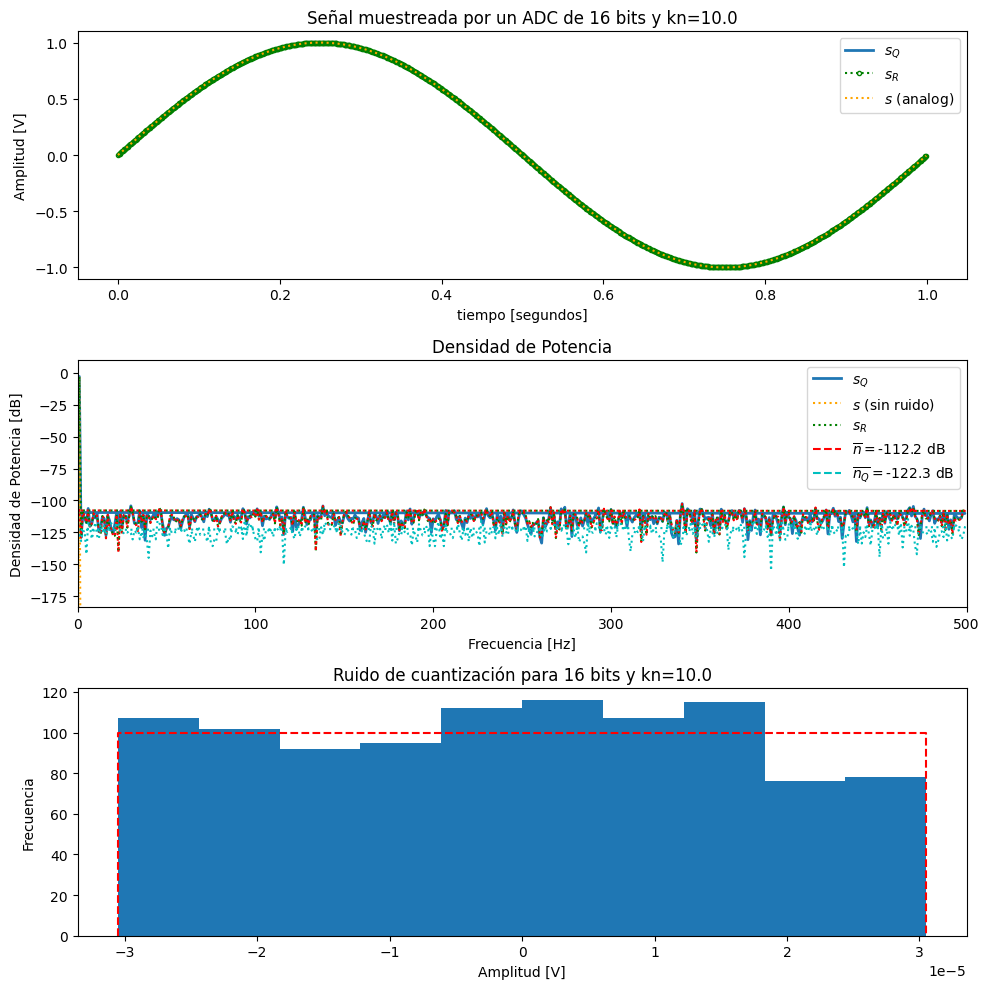

In [5]:
for b in [4 , 8 , 16]:
    for k in [0.1 , 1 , 10]:
        
        q = vf / (2**(b-1))
        
        bins = 10
        
        r = np.random.normal(0, np.sqrt(k) * q / np.sqrt(12), nn)
        sr = s + r
        
        sq , e = cuantizar(sr , vf , b)
        
        S = np.fft.fft(s , axis = 0) / nn
        SR = np.fft.fft(sr , axis = 0) / nn
        SQ = np.fft.fft(sq , axis = 0) / nn
        E = np.fft.fft(e , axis = 0) / nn
        R = np.fft.fft(r , axis = 0) / nn
        
        ff = np.fft.fftfreq(nn, d=1/fs)  
        bfrec = ff <= fs/2
        
        Nnq_mean = np.mean(np.abs(E)**2)
        nNn_mean = np.mean(np.abs(R)**2)
        
        ft_Srq_graph = 10 * np.log10(2 * np.abs(SQ[bfrec])**2)
        ft_As_graph  = 10 * np.log10(2 * np.abs(S[bfrec])**2)
        ft_Sr_graph  = 10 * np.log10(2 * np.abs(SR[bfrec])**2)
        ft_Nn_graph  = 10 * np.log10(2 * np.abs(R[bfrec])**2)
        ft_Nq_graph  = 10 * np.log10(2 * np.abs(E[bfrec])**2)
        nNn_mean_graph = 10 * np.log10(2 * np.array([nNn_mean, nNn_mean]))
        Nnq_mean_graph = 10 * np.log10(2 * np.array([Nnq_mean, Nnq_mean]))
        
        fig, axs = plt.subplots(3, 1, figsize=(10, 10))
        
        # Señales en el tiempo
        axs[0].plot(t, sq, lw=2, label='$ s_Q $')
        axs[0].plot(t, sr, linestyle=':', color='green', marker='o', markersize=3,
                    markerfacecolor='none', markeredgecolor='green', fillstyle='none',
                    label='$ s_R $')
        axs[0].plot(t, s, color='orange', ls='dotted', label='$ s $ (analog)')
        axs[0].set_title('Señal muestreada por un ADC de {:d} bits y kn={:.1f}'.format(b, k))
        
        axs[0].set_xlabel('tiempo [segundos]')
        axs[0].set_ylabel('Amplitud [V]')
        axs[0].legend()
        
        # Densidad de potencia
        axs[1].plot(ff[bfrec], ft_Srq_graph, lw=2, label='$ s_Q $')
        axs[1].plot(ff[bfrec], ft_As_graph, color='orange', ls='dotted', label='$ s $ (sin ruido)')
        axs[1].plot(ff[bfrec], ft_Sr_graph, ':g', label='$ s_R $')
        
        axs[1].plot(ff[bfrec], ft_Nn_graph, ':r')
        axs[1].plot(ff[bfrec], ft_Nq_graph, ':c')
        
        axs[1].plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), nNn_mean_graph,
                     '--r', label='$ \overline{n} =$' + '{:3.1f} dB'.format(10 * np.log10(2 * nNn_mean)))
        
        axs[1].plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), Nnq_mean_graph,
                     '--c', label='$ \overline{n_Q} =$' + '{:3.1f} dB'.format(10 * np.log10(2 * Nnq_mean)))
        
        axs[1].set_title('Densidad de Potencia')
        axs[1].set_ylabel('Densidad de Potencia [dB]')
        axs[1].set_xlabel('Frecuencia [Hz]')
        axes_hdl_1 = axs[1].legend()
        axs[1].set_ylim((1.5*np.min(10*np.log10(2*np.array([Nnq_mean, nNn_mean]))), 10))
        axs[1].set_xlim(0, fs/2)
        
        # Histograma del ruido de cuantificación
        axs[2].hist(e, bins=bins)
        axs[2].plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, nn/bins, nn/bins, 0]), '--r')
        axs[2].set_title('Ruido de cuantización para {:d} bits y kn={:.1f}'.format(b, k))
        axs[2].set_xlabel('Amplitud [V]')
        axs[2].set_ylabel('Frecuencia')
        
        plt.tight_layout()
        plt.show()

## 5. Conclusiones

A partir de los gráficos generados en la segunda parte, se pueden extraer algunas conclusiones.
- Se observa una disminución clara del ruido de cuantización al aumentar el número de bits del ADC. Esto se observa en los tres gráficos: en el tiempo, la señal cuantizada se acerca más a la analógica; en la densidad de potencia, disminuye el piso de ruido de cuantización; y el histograma tiene límites más pequeños.
- Para un mismo número de bits del ADC, el ruido gaussiano a la entrada aumenta al aumentar k, que es justamente lo que se busca. Este aumento impacta en el ruido de cuantización, según se puede observar comparando los gráficos para un mismo B.
- Se confirma que el ruido de cuantización distribuye según una rectangular, la cual está centrada en 0 y se extiende en el rango $±\frac{q}{2}$

Como comentario final, sería interesante agregar al inicio de la simulación un código que relacione una relación señal a ruido dada con la potencia de ruido analógico, de forma de poder simular las señales desde un inicio con valores medibles y/o requisitos impuestos.